# 6. Evalulation

In this notebook there are plots with accuracy for each epoch.<br>
Each model was evaluated based on accuracy, f-1 score and confusion matrix.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import pickle

import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

from sklearn.metrics import confusion_matrix
from seaborn import heatmap
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
# Read the data
X_train = np.load('/content/drive/MyDrive/INL_PROJEKT/preprocessed_data/X_train.npy')
X_test = np.load('/content/drive/MyDrive/INL_PROJEKT/preprocessed_data/X_test.npy')
y_train = np.load('/content/drive/MyDrive/INL_PROJEKT/preprocessed_data/y_train.npy')
y_test = np.load('/content/drive/MyDrive/INL_PROJEKT/preprocessed_data/y_test.npy')

In [ ]:
# Read tokenizer
with open('/content/drive/MyDrive/INL_PROJEKT/preprocessed_data/tokenizer.pickle', 'rb') as f:
    tokenizer = pickle.load(f)

In [ ]:
# load best models
model_BILSTM = tf.keras.models.load_model('/content/drive/MyDrive/INL_PROJEKT/BILSTM/model_epoch_12')

model_CONV = tf.keras.models.load_model('/content/drive/MyDrive/INL_PROJEKT/CONV/model_epoch_5')

Text(0.5, 0, 'Epoch')

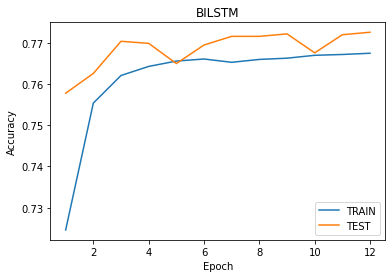

In [ ]:
# plot BILSTM accuracy
plt.plot(range(1,13),[0.7246,0.7554,0.7621,0.7643,0.7656,0.7661,0.7653,0.766,0.7663,0.767,0.7672,0.7675], label='TRAIN')
plt.plot(range(1,13),[0.7578,0.7626,0.7704,0.7699,0.7650,0.7695,0.7716,0.7716,0.7722,0.7676,0.772,0.7726], label='TEST')
plt.legend()
plt.title('BILSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

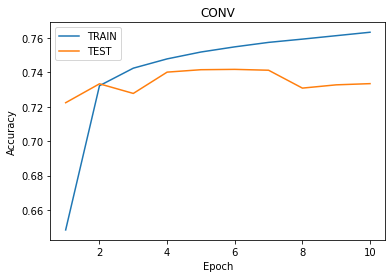

In [ ]:
# plot CONV accuracy
plt.plot(range(1,11),[0.6484,0.7323,0.7425,0.7479,0.7519,0.7549,0.7575,0.7594,0.7614,0.7634], label='TRAIN')
plt.plot(range(1,11),[0.7224,0.7334,0.7278,0.7402,0.7416,0.7418,0.7413,0.7309,0.7328,0.7335], label='TEST')
plt.legend()
plt.title('CONV')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [ ]:
test_loss, test_acc = model_BILSTM.evaluate(X_test, y_test, verbose=0)
train_loss, train_acc = model_BILSTM.evaluate(X_train, y_train, verbose=0)
print('----- BILSTM -----')
print('TRAIN accuracy: ', train_acc)
print('TEST accuracy: ', test_acc)

test_loss, test_acc = model_CONV.evaluate(X_test, y_test, verbose=0)
train_loss, train_acc = model_CONV.evaluate(X_train, y_train, verbose=0)
print('----- CNN -----')
print('TRAIN accuracy: ', train_acc)
print('TEST accuracy: ', test_acc)

del train_loss, test_loss, train_acc, test_acc

----- BILSTM -----
TRAIN accuracy:  0.781730592250824
TEST accuracy:  0.7721530199050903
----- CNN -----
TRAIN accuracy:  0.7601547837257385
TEST accuracy:  0.7416080236434937


In [ ]:
# predictions and confusion matrix
BILSTM_test_predictions = model_BILSTM.predict(X_test)
BILSTM_test_conf_matrix = confusion_matrix(y_test.argmax(axis=1), BILSTM_test_predictions.argmax(axis=1), normalize='true')

CONV_test_predictions = model_CONV.predict(X_test)
CONV_test_conf_matrix = confusion_matrix(y_test.argmax(axis=1), CONV_test_predictions.argmax(axis=1), normalize='true')

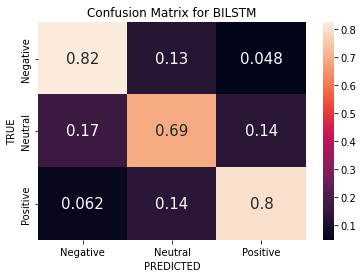

In [ ]:
# confusion matrix for BILSTM
heatmap(BILSTM_test_conf_matrix, annot=True, xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"], annot_kws={"fontsize":15})
plt.title('Confusion Matrix for BILSTM')
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')
plt.show()

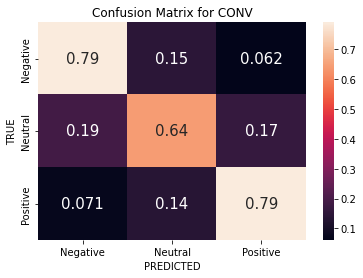

In [ ]:
# confusion matrix for CONV
heatmap(CONV_test_conf_matrix, annot=True, xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"], annot_kws={"fontsize":15})
plt.title('Confusion Matrix for CONV')
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')
plt.show()

In [ ]:
# Classification report
print('======================= BILSTM =======================')
print(classification_report(y_test.argmax(axis=1), BILSTM_test_predictions.argmax(axis=1), target_names=["Negative", "Neutral", "Positive"]))
print('\n======================== CONV ========================')
print(classification_report(y_test.argmax(axis=1), CONV_test_predictions.argmax(axis=1), target_names=["Negative", "Neutral", "Positive"]))

======================= BILSTM =======================
              precision    recall  f1-score   support

    Negative       0.78      0.82      0.80     41076
     Neutral       0.73      0.69      0.71     41496
    Positive       0.81      0.80      0.81     41147

    accuracy                           0.77    123719
   macro avg       0.77      0.77      0.77    123719
weighted avg       0.77      0.77      0.77    123719


======================== CONV ========================
              precision    recall  f1-score   support

    Negative       0.75      0.79      0.77     41076
     Neutral       0.69      0.64      0.67     41496
    Positive       0.78      0.79      0.78     41147

    accuracy                           0.74    123719
   macro avg       0.74      0.74      0.74    123719
weighted avg       0.74      0.74      0.74    123719



In [ ]:
# Function to predict overall rating for given text
def predict_sentiment(model, text, max_len = 600):
    overall = ["Negative", "Neutral", "Positive"]#[1,3,5]
    sequence = tokenizer.texts_to_sequences([text])
    test_review = pad_sequences(sequence, maxlen=max_len) # in our case: max_len = 600
    return overall[np.around(model.predict(test_review), decimals=4).argmax(axis=1)[0]]

In [ ]:
# POSITIVE
review_text = 'The best book I have ever read. Just gorgeous!!!'
print(predict_sentiment(model_BILSTM, review_text))
print(predict_sentiment(model_CONV, review_text))

Positive
Positive


In [ ]:
# NEUTRAL
review_text = '''It may not be the best book I have ever read. however it is
not that bad as for this author and it is rather difficult to expect something better from him.'''
print(predict_sentiment(model_BILSTM, review_text))
print(predict_sentiment(model_CONV, review_text))

Neutral
Neutral


In [ ]:
# NEGATIVE
review_text = '''This book sucks! Total crap. I will never buy anything
here again. Waste of time and money'''
print(predict_sentiment(model_BILSTM, review_text))
print(predict_sentiment(model_CONV, review_text))

Negative
Negative
